In [5]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as npr

Problem. 5. (30 points)

Using the NSFG pregnancy data set (the same data set
  that we have used throughout the class), conduct a binary hypothesis
  test (a classical test, not Bayesian) to determine if a woman's age 
  during her pregnancy affects the birth weight of the child.  Solutions should be submitted as  Jupyter notebook to the Canvas assignment "Midterm Problem 5".

  To make this problem easier, I have already processed the data and pickled it to a file.  Different groups of students will use different subsets of the original data, which are in different pickle files. You will choose to uncomment one of the lines below to use a particular pickle file based on the first letter of your last name:
  
* **A-K** weights1.pickle
* **L-S** weights2.pickle
* **T-Z** weights3.pickle

Each pickle file contains three numpy arrays of birth weights in ounces in the following order
1. The first array is
  for women who were under age 30 at the time they got pregnant
2. The second array is for women who were 30 or older at the time
  they got pregnant.  
3. The third array contains the birth weights for both of the above groups.

In [6]:
file=open('weights1.pickle','rb')
#file=open('weights2.pickle','rb')
#file=open('weights3.pickle','rb')

In [7]:
young=pickle.load(file)
older=pickle.load(file)
both=pickle.load(file)

In [9]:
file.close()

**(a) On the same graph, plot normalized histograms of the same data set. Adjust the number of bins so that differences in the weights of the babies can be readily observed.**

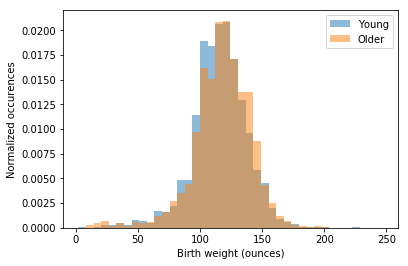

In [47]:
n,bins,patches = plt.hist(young, alpha=0.5, bins=40, label="Young", density=True);
plt.hist(older, bins=bins, alpha=0.5, label="Older", density=True);
plt.xlabel("Birth weight (ounces)");
plt.ylabel("Normalized occurences");
plt.legend();

**(b) Determine the averages for each data set (young vs. older) **

In [64]:
print("Average of young data set: ",np.mean(young),".",sep="")
print("Average of older data set: ",np.mean(older),".",sep="")

Average of young data set: 115.88054938956715.
Average of older data set: 117.70546448087431.


**(c) Determine the medians for each data set (young vs. older) **

In [65]:
print("Median of young data set: ",np.median(young),".",sep="")
print("Median of older data set: ",np.median(older),".",sep="")

Median of young data set: 117.0.
Median of older data set: 119.0.


**(d) Based on these observations, which have heavier babies, younger mothers or older mothers? Briefly explain.**

It appears that the older mothers may have heavier babies, but we cannot be sure that this is not noise at this point of our analysis.

**(d) Determine the proportion of births that are over 8 pounds (i.e., 128 ounces) for each class. **

In [194]:
young_prop = np.sum(young > 128)/len(young)
older_prop = np.sum(older > 128)/len(older)
diff = older_prop - young_prop

print("The proportion of births that are over 8 pounds for the younger data set is = ",young_prop,".",sep="")
print("The proportion of births that are over 8 pounds for the older data set is = ",older_prop,".",sep="")
print(diff)

The proportion of births that are over 8 pounds for the younger data set is = 0.2561043285238624.
The proportion of births that are over 8 pounds for the older data set is = 0.3087431693989071.
0.05263884087504472


**(e) Use resampling (simulation) to determine if the effect observed in part (d) is statistically significant (at the p<=0.05 level). Provide your code, a clear conclusion, and a brief discussion of why you made that conclusion. **

In [113]:
len(young),len(older)

(7208, 1830)

In [206]:
pooled = both
num_sims = 100000
event_count = 0
max_diff = 0
for i in range(num_sims):
    young_resample = npr.choice(pooled, size=7208)
    older_resample = npr.choice(pooled, size=1830)
    young_resample_prop = np.sum(young_resample > 128)/len(young_resample)
    older_resample_prop = np.sum(older_resample > 128)/len(older_resample)

    diff_resample = older_resample_prop - young_resample_prop
    
    
    
    
    if (abs(diff_resample) >= diff):
        event_count+=1
        
    if (abs(diff_resample) > max_diff):
        max_diff = abs(diff_resample)
        
print(max_diff)

0.05336086800943701


In [208]:
print(event_count/num_sims)
print(event_count)

1e-05
1
